In [1]:
import pandas as pd
import ast
import cv2
import matplotlib.pyplot as plt

In [2]:
imagettes=pd.read_csv("/mnt/VegaSlowDataDisk/c3po/Images_aquises/imagettes.csv")
fichierClasses= "/mnt/VegaSlowDataDisk/c3po/Images_aquises/Table_Labels_to_Class.csv" # overwritten by --classes myFile
frame=pd.read_csv(fichierClasses,index_col=False)

In [3]:
FP=[19, 159, 1, 37, 57]
TP=[166, 472, 16, 265, 95]

In [4]:
def to_reference_labels (df,class_colum,frame=frame):

    #flatten list in Labels_File
    cat=[]
    for i in range(len(frame["categories"]) ):
        cat.append( frame["categories"][i] )

    liste = [ast.literal_eval(item) for item in cat]

    # set nouvelle_classe to be the "unified" class name
    for j in range(len(frame["categories"])):
        #classesToReplace = frame["categories"][j].split(",")[0][2:-1]
        className = frame["categories"][j].split(",")[0][2:-1]
        #df["nouvelle_classe"]=df["classe"].replace(classesToReplace,className)
        df[class_colum]=df[class_colum].replace(liste[j],className)

    return df

In [5]:

imagettes=to_reference_labels (imagettes,"classe")

liste_to_keep=["chevreuil","corneille","faisan","lapin","pigeon","oiseau"]

imagettes=imagettes[imagettes["classe"].isin(liste_to_keep)] 
imagettes=imagettes[imagettes["filename"]!='image_2019-04-18_17-56-42.jpg']
imagettes=imagettes[imagettes["filename"]!='image_2019-04-30_18-17-14.jpg']

imagettes["classe"].unique()

array(['oiseau', 'corneille', 'pigeon', 'chevreuil', 'lapin', 'faisan'],
      dtype=object)

## Nombre d'images

In [9]:
liste_folders=['./DonneesPI/timeLapsePhotos_Pi1_0','./DonneesPI/timeLapsePhotos_Pi1_1','./DonneesPI/timeLapsePhotos_Pi1_2','./DonneesPI/timeLapsePhotos_Pi1_3','./DonneesPI/timeLapsePhotos_Pi1_4'   ]
imagettes_nb=[]
for folder in liste_folders:
    #nb_images=len(imagettes["filename"].unique())
    nb_images=len(imagettes["filename"][imagettes["path"]==folder].unique())
    print("le nombre d'images est :",nb_images)
    imagettes_nb.append(nb_images)
nb_all_images=len(imagettes["filename"][imagettes["path"].isin(liste_folders)].unique())
print("nombre d'images Pi total",nb_all_images)

le nombre d'images est : 101
le nombre d'images est : 522
le nombre d'images est : 70
le nombre d'images est : 482
le nombre d'images est : 313
nombre d'images Pi total 1488


## Nombre d'oiseaux

In [10]:
nb_birds=[]
birds=["corneille","faisan","pigeon","oiseau"]
imagettes_birds=imagettes[imagettes["classe"].isin(birds)]

liste_folders=['./DonneesPI/timeLapsePhotos_Pi1_0','./DonneesPI/timeLapsePhotos_Pi1_1','./DonneesPI/timeLapsePhotos_Pi1_2','./DonneesPI/timeLapsePhotos_Pi1_3','./DonneesPI/timeLapsePhotos_Pi1_4'   ]

for folder in liste_folders:
    nb_birds_folder=len(imagettes_birds["imagetteName"][imagettes_birds["path"]==folder].unique())
    nb_birds.append(nb_birds_folder)
    print("le nombre d'images est :",nb_birds_folder)

nb_birds_folder=len(imagettes_birds["imagetteName"][imagettes_birds["path"].isin(liste_folders)].unique())
print("nombre d'oiseux total",nb_birds_folder)

le nombre d'images est : 274
le nombre d'images est : 930
le nombre d'images est : 70
le nombre d'images est : 492
le nombre d'images est : 350
nombre d'oiseux total 2116


## Nombre d'animaux

In [91]:
nb_animals=[]
animals=["lapin","faisan"]
imagettes_animals=imagettes[imagettes["classe"].isin(animals)]

liste_folders=['./DonneesPI/timeLapsePhotos_Pi1_0','./DonneesPI/timeLapsePhotos_Pi1_1','./DonneesPI/timeLapsePhotos_Pi1_2','./DonneesPI/timeLapsePhotos_Pi1_3','./DonneesPI/timeLapsePhotos_Pi1_4'   ]

for folder in liste_folders:
    nb_animals_folder=len(imagettes_animals["imagetteName"][imagettes_animals["path"]==folder].unique())
    nb_animals.append(nb_animals_folder)
    print("le nombre d'imagettes est :",nb_animals_folder)

le nombre d'imagettes est : 0
le nombre d'imagettes est : 157
le nombre d'imagettes est : 0
le nombre d'imagettes est : 220
le nombre d'imagettes est : 117


## Find the Best pictures 

In [15]:
imagettes.shape
imagettes["path"].unique()
to_kepp=['./DonneesPI/timeLapsePhotos_Pi1_4',
       './DonneesPI/timeLapsePhotos_Pi1_3',
       './DonneesPI/timeLapsePhotos_Pi1_2',
       './DonneesPI/timeLapsePhotos_Pi1_1',
       './DonneesPI/timeLapsePhotos_Pi1_0']
imagettes_exploit=imagettes[imagettes["path"].isin(to_kepp)]
imagettes_exploit.head()

,path,filename,width,height,classe,xmin,ymin,xmax,ymax,index,imagetteName
724,./DonneesPI/timeLapsePhotos_Pi1_4,image_2019-06-14_15-46-54.jpg,1280,720,corneille,709,305,722,317,724,image_2019-06-14_15-46-54_corneille_724.JPG
725,./DonneesPI/timeLapsePhotos_Pi1_4,image_2019-06-14_15-46-54.jpg,1280,720,ground,694,306,706,319,725,image_2019-06-14_15-46-54_ground_725.JPG
726,./DonneesPI/timeLapsePhotos_Pi1_4,image_2019-06-14_15-46-54.jpg,1280,720,corneille,762,313,774,324,726,image_2019-06-14_15-46-54_corneille_726.JPG
727,./DonneesPI/timeLapsePhotos_Pi1_4,image_2019-06-14_15-46-54.jpg,1280,720,ground,778,311,790,322,727,image_2019-06-14_15-46-54_ground_727.JPG
728,./DonneesPI/timeLapsePhotos_Pi1_4,image_2019-06-14_15-47-11.jpg,1280,720,corneille,755,293,774,308,728,image_2019-06-14_15-47-11_corneille_728.JPG


In [21]:
im_chang=imagettes_exploit['filename'].value_counts()

In [22]:
im_chang.head(20)

image_2019-04-19_17-34-31.jpg    22
image_2019-04-19_17-59-50.jpg    22
image_2019-04-19_17-59-33.jpg    20
image_2019-04-06_08-28-24.jpg    20
image_2019-04-19_17-34-47.jpg    20
image_2019-04-19_17-33-40.jpg    18
image_2019-04-19_17-33-24.jpg    16
image_2019-04-19_17-33-57.jpg    16
image_2019-04-30_18-27-49.jpg    16
image_2019-04-19_18-00-56.jpg    16
image_2019-04-30_18-28-39.jpg    16
image_2019-04-19_17-35-04.jpg    16
image_2019-04-30_18-28-05.jpg    16
image_2019-04-30_18-25-35.jpg    14
image_2019-04-19_17-37-01.jpg    14
image_2019-04-19_18-01-13.jpg    14
image_2019-04-19_18-00-06.jpg    14
image_2019-04-30_18-25-52.jpg    14
image_2019-04-19_17-58-59.jpg    14
image_2019-04-30_18-28-55.jpg    14
Name: filename, dtype: int64

In [ ]:
imagettes_exploit["largeur"]=imagettes_exploit["xmax"]-imagettes_exploit["xmin"]
imagettes_exploit["profondeur"]=imagettes_exploit["ymax"]-imagettes_exploit["ymin"]
imagettes_exploit["surface"]=imagettes_exploit["profondeur"]*imagettes_exploit["largeur"]

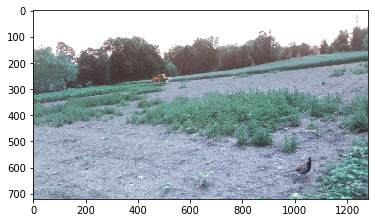

In [43]:
grand_oiseau=cv2.imread("/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_4/image_2019-06-15_08-22-42.jpg")
plt.imshow(grand_oiseau)

/home/marcpozzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/marcpozzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/marcpozzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va